# Draft: AuxTel Pointing

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

from astropy.table import Table, join

In [10]:
%matplotlib inline


## The Dataset

This sample was queried using the script `query_pointing_bluter.py`. Basically, the code query the WCS solution from the bulter calibrate task and some information from the exposure metadata.

The main quantities of this dataset are:
- `RA`, `DEC` : pointing sky position from the exposure metadata
- `RA_WCS`, `DEC_WCS` : pointing sky position from the wcs solutions
- `PNT_OFFSET`: angular distance between the two pointings.

The other columns are exclusively from the metadata: `MJD`,`EXPTIME`,`TEMP_SET`,`CCDTEMP`,`FILTER`,`ELSTART`,`ELEND`,`AZSTART`,`AZEND`

The file `data/checking_auxtel_pointing_{date}.csv` contains info about 1421 exposures taken from Feb 2020 up to Nov 2021. The collection used to generate this file was `u/mfl/testProcessCcd_srcMatchFull_181e6356`. And it's from the `lsst.rapid.analysis.butlerUtils`.



# The Telescope Pointing

In [104]:
import pandas as pd
date = 23032022
df = pd.read_csv(f'data/checking_auxtel_pointing_{date}.csv',index_col=0)
# df = pd.read_csv('data/test_checking_auxtel_pointing_23032022.csv',index_col=0)


In [105]:
import numpy as np

deg = np.pi/180.
def separation(ra1,dec1,ra2,dec2):
    return np.sqrt( np.cos(dec1*deg)*(ra1-ra2)**2 + (dec1-dec2)**2 )*3600.

def getAngDist(ra1, dec1, ra2, dec2):
    # output in arcmin
    delt_lon = (ra1 - ra2)*np.pi/180.
    delt_lat = (dec1 - dec2)*np.pi/180.
    # Haversine formula
    dist = 2.0*np.arcsin( np.sqrt( np.sin(delt_lat/2.0)**2 + \
         np.cos(dec1*np.pi/180.)*np.cos(dec2*np.pi/180.)*np.sin(delt_lon/2.0)**2 ) )  
    return (dist/np.pi*180.)*60

In [106]:
df['AZMEAN'] = 0.5*(df['AZEND']+df['AZSTART'])
df['ELMEAN'] = 0.5*(df['ELEND']+df['ELSTART'])

df['dRA'] = (df['RA_WCS']-df['RA'])*60
df['dDEC']= (df['DEC_WCS']-df['DEC'])*60

df['PNT_OFFSET'] = getAngDist(df['RA_WCS'], df['DEC_WCS'], df['RA'], df['DEC'])

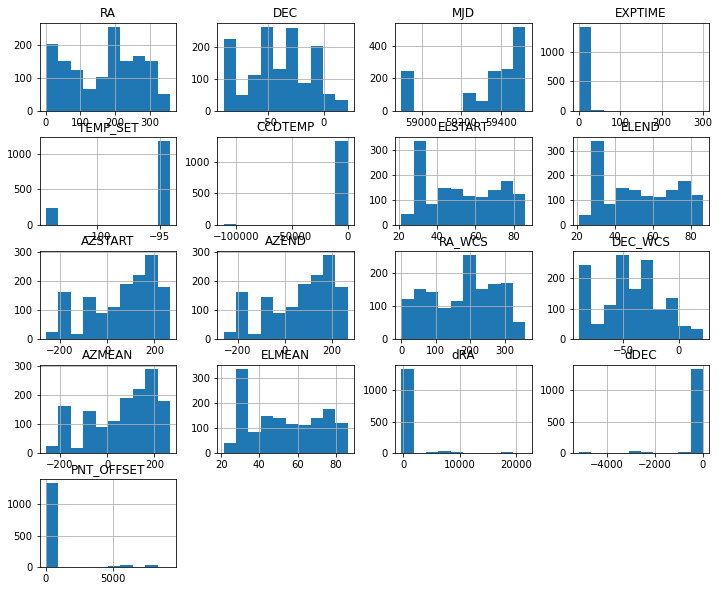

In [107]:
_ = df.hist(figsize=(12,10))

In [108]:
outliers = np.abs(df['PNT_OFFSET'])>60
df[outliers]

,RA,DEC,MJD,EXPTIME,TEMP_SET,CCDTEMP,FILTER,ELSTART,ELEND,AZSTART,AZEND,RA_WCS,DEC_WCS,AZMEAN,ELMEAN,dRA,dDEC,PNT_OFFSET
2021011900179,1.996375,-0.897472,59234.116715,3.0,-94.150002,NaN,empty_1,62.509476,62.521548,147.024464,147.051249,114.400505,-51.419156,147.037856,62.515512,6744.247795,-3031.301027,6181.620986
2021011900182,1.996375,-0.897472,59234.121005,3.0,-94.150002,NaN,empty_1,63.222464,63.233743,148.452266,148.476207,114.401039,-51.419238,148.464236,63.228104,6744.279837,-3031.305968,6181.638384
2021011900188,1.996375,-0.897472,59234.136868,3.0,-94.150002,NaN,empty_1,65.573147,65.582377,154.631728,154.662058,114.406677,-51.424131,154.646893,65.577762,6744.618089,-3031.599511,6181.745796
2021011900191,1.996375,-0.897472,59234.139023,3.0,-94.150002,NaN,empty_1,65.855969,65.863392,155.590991,155.617092,114.407294,-51.424365,155.604041,65.859680,6744.655154,-3031.613586,6181.763279
2021011900192,1.996375,-0.897472,59234.146246,3.0,-94.150002,NaN,empty_1,66.728490,66.736190,159.021549,159.055838,114.388345,-51.424319,159.038694,66.732340,6743.518185,-3031.610802,6181.091480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021012600133,1.780578,-0.773464,59241.101377,5.0,-94.150002,NaN,empty_1,73.887442,73.900387,153.255603,153.327429,102.030048,-44.317590,153.291516,73.893914,6014.968217,-2612.647548,5806.136521
2021012600138,1.780578,-0.773464,59241.105345,5.0,-94.150002,NaN,empty_1,74.409563,74.421010,156.453920,156.531433,102.030637,-44.318245,156.492676,74.415287,6015.003567,-2612.686854,5806.156280
2021012600145,1.780578,-0.773464,59241.110511,5.0,-94.150002,NaN,RG610,74.992121,75.001446,160.984265,161.069009,102.031544,-44.319370,161.026637,74.996784,6015.057973,-2612.754322,5806.185746
2021012600146,1.780578,-0.773464,59241.113869,20.0,-94.150002,NaN,RG610,75.288918,75.311460,163.955315,164.209695,102.031987,-44.320143,164.082505,75.300189,6015.084586,-2612.800717,5806.198353


## Subsample

In [109]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

df1 = df[cols][~outliers]

In [110]:
df1

,PNT_OFFSET,RA,DEC,MJD,EXPTIME,TEMP_SET,CCDTEMP,FILTER,ELSTART,ELEND,AZSTART,AZEND,RA_WCS,DEC_WCS,AZMEAN,ELMEAN,dRA,dDEC
2020021700328,0.541438,144.696586,-60.091873,58897.172369,5.0,-104.150002,-100.805046,empty_3,59.859032,59.862084,173.810313,173.842712,144.702793,-60.083396,173.826512,59.860558,0.372380,0.508598
2020021900181,0.390710,307.078084,-87.472205,58899.053545,5.0,-104.150002,-100.776344,RG610,28.093086,28.092282,181.448881,181.447321,306.948404,-87.469098,181.448101,28.092684,-7.780807,0.186407
2020021900183,0.395419,307.078084,-87.472205,58899.053854,5.0,-104.150002,-100.766220,RG610,28.090576,28.089861,181.443863,181.442496,306.948123,-87.468959,181.443179,28.090218,-7.797656,0.194761
2020021900184,0.651232,307.078084,-87.472205,58899.054891,2.0,-104.150002,-100.795662,empty_1,28.076867,28.076392,181.429553,181.428578,306.945464,-87.463069,181.429065,28.076630,-7.957195,0.548176
2020021900185,0.620923,307.078084,-87.472205,58899.056000,2.0,-104.150002,-100.791946,empty_1,28.072545,28.072041,181.422354,181.421200,307.178286,-87.462851,181.421777,28.072293,6.012094,0.561228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021110400926,0.136816,162.767734,-48.503156,59523.326981,15.0,-94.150002,-90.320419,FELH0600,34.140412,34.189538,130.793951,130.784860,162.770156,-48.504776,130.789406,34.164975,0.145312,-0.097205
2021110400927,0.134490,162.767734,-48.503156,59523.327185,15.0,-94.150002,-90.328224,FELH0600,34.189538,32.238604,130.784860,130.757985,162.770099,-48.504759,130.771423,33.214071,0.141911,-0.096160
2021110400942,0.523322,102.086582,-43.056208,59523.332988,5.0,-94.150002,-90.324783,FELH0600,75.573488,75.585827,154.703962,154.788120,102.082373,-43.048047,154.746041,75.579657,-0.252560,0.489700
2021110400949,0.825247,102.086582,-43.056208,59523.338070,5.0,-94.150002,-90.336678,FELH0600,76.174799,76.184880,159.616764,159.709761,102.075312,-43.067226,159.663263,76.179839,-0.676184,-0.661033


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.matshow(df.corr())
# plt.show()

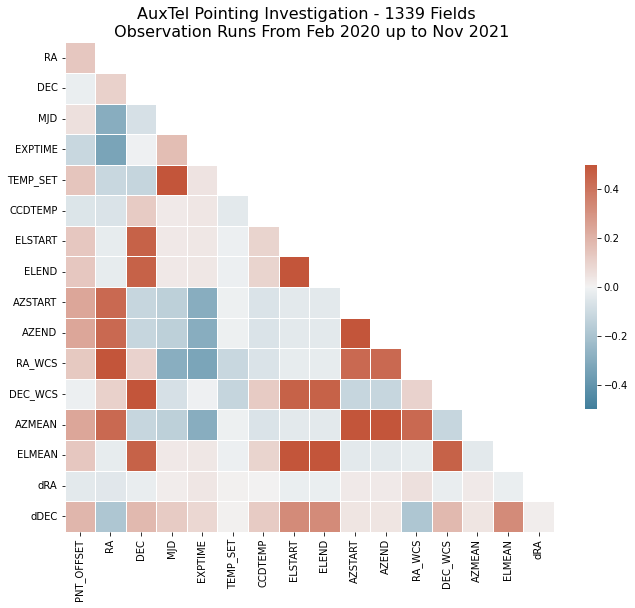

In [112]:
# Compute the correlation matrix
df_corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(f'AuxTel Pointing Investigation - {len(df1)} Fields \n Observation Runs From Feb 2020 up to Nov 2021',fontsize=16)
plt.savefig(f'figures/correlation_matrix_{date}.png',facecolor='w',transparent=False,dpi=100)

Text(0.5, 1.0, 'AuxTel Pointing Investigation - 1339 Fields \n Observation Runs From Feb 2020 up to Nov 2021')

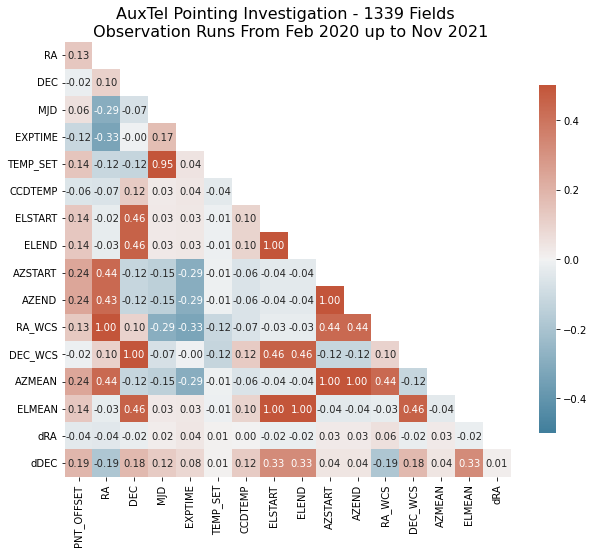

In [113]:
fig, ax = plt.subplots(figsize=(10, 8))

df_corr = df1.corr()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           vmin=-0.5, vmax=0.5, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.title(f'AuxTel Pointing Investigation - {len(df1)} Fields \n Observation Runs From Feb 2020 up to Nov 2021',fontsize=16)

# plt.savefig(f'figures/correlation_matrix_{date}.png',facecolor='w',transparent=False,dpi=100)

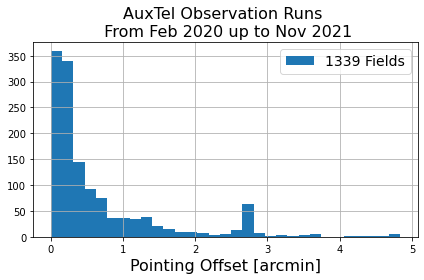

In [137]:
df1['PNT_OFFSET'].hist(bins=31,label=f'{len(df1)} Fields')
plt.xlabel('Pointing Offset [arcmin]',fontsize=16)
plt.legend(fontsize=14)
plt.title(f'AuxTel Observation Runs \n From Feb 2020 up to Nov 2021',fontsize=16)
plt.tight_layout()
plt.savefig(f'figures/pointing_offset_distribution_{date}.png',facecolor='w',transparent=False,dpi=100)

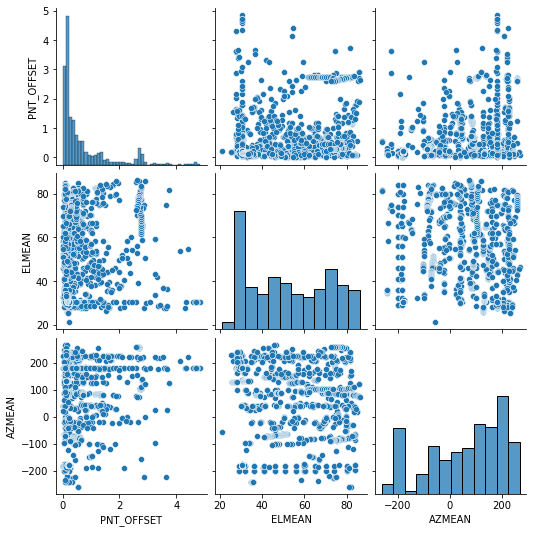

In [114]:
columns = ['PNT_OFFSET','ELMEAN','AZMEAN']
sns.pairplot(df1[columns])

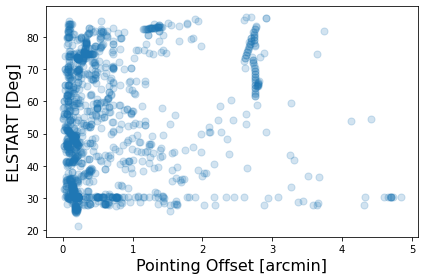

In [186]:
plt.scatter(df1.PNT_OFFSET, df1.ELSTART, s=50, alpha=0.2)
plt.ylabel('ELSTART [Deg]',fontsize=16)
plt.xlabel('Pointing Offset [arcmin]',fontsize=16)
plt.tight_layout()
plt.savefig(f'figures/pointing_offset_elevation_{date}.png',facecolor='w',transparent=False,dpi=100)

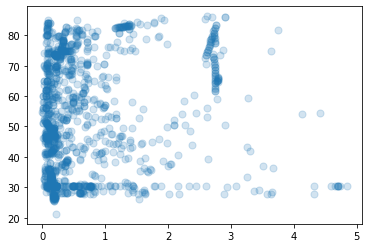

In [139]:
plt.scatter(df1.PNT_OFFSET, df1.ELMEAN, s=50, alpha=0.2)

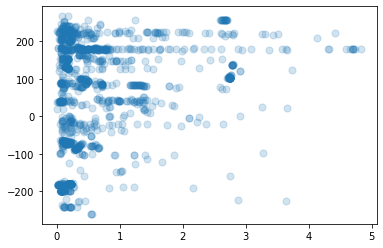

In [140]:
plt.scatter(df1.PNT_OFFSET, df1.AZMEAN, s=50, alpha=0.2)

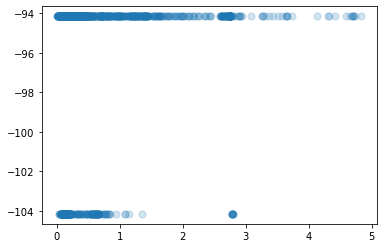

In [160]:
plt.scatter(df1.PNT_OFFSET, df1.TEMP_SET, s=50, alpha=0.2)
# plt.ylim(-94.1501,-94.1497)
# plt.ylim(-104.1,-104.25)

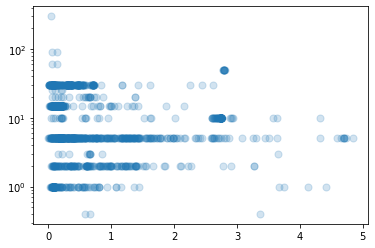

In [162]:
plt.scatter(df1.PNT_OFFSET, df1.EXPTIME, s=50, alpha=0.2)
plt.yscale('log')

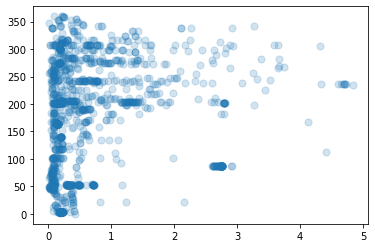

In [165]:
plt.scatter(df1.PNT_OFFSET, df1.RA_WCS, s=50, alpha=0.2)

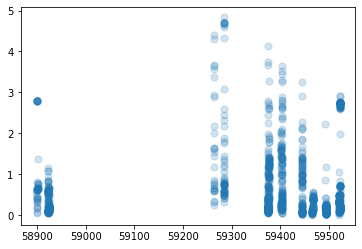

In [181]:
plt.scatter(df1.MJD, df1.PNT_OFFSET, s=50, alpha=0.2)
# plt.xlim(202102100,)
# plt.xscale('log')